In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline\

from pandas import ExcelWriter
from pandas import ExcelFile

pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.shape

(12043, 23)

In [5]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

Data Cleaning

In [7]:
missing_values = [f for f in data if data[f].isnull().sum()>0]

In [8]:
missing_values

['card_present_flag',
 'bpay_biller_code',
 'merchant_id',
 'merchant_code',
 'merchant_suburb',
 'merchant_state',
 'merchant_long_lat']

In [9]:
missing_cat = [f for f in data if data[f].isnull().sum()>0 and data[f].dtypes == 'O']

In [10]:
missing_cat

['bpay_biller_code',
 'merchant_id',
 'merchant_suburb',
 'merchant_state',
 'merchant_long_lat']

In [11]:
missing_num = [f for f in data if data[f].isnull().sum()>0 and data[f].dtypes != 'O']

In [12]:
missing_num

['card_present_flag', 'merchant_code']

# Handling Missing Values

In [13]:
data['card_present_flag'].unique()

array([ 1.,  0., nan])

Missing values in this column are when Status is posted and not yet authorized so we can impute 0 according to status 

In [14]:
data['card_present_flag'] = data['card_present_flag'].fillna(0) 

In [15]:
data['card_present_flag'].isnull().sum()

0

In [16]:
data['card_present_flag'].unique()

array([1., 0.])

Dropping uneccessary columns

In [17]:
data = data.drop(['bpay_biller_code'], axis=1)

In [18]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [19]:
data['merchant_code'] = data['merchant_code'].fillna('Missing')

In [20]:
data = data.drop(['merchant_id'], axis=1)

Filling Missing values in Suburb and State afte getting mode results

In [21]:
mode = data.filter(["merchant_suburb", "merchant_state"]).mode()

In [22]:
mode

,merchant_suburb,merchant_state
0,Melbourne,NSW


In [23]:
data[["merchant_suburb", "merchant_state"]]=data[["merchant_suburb", "merchant_state"]].fillna(mode.iloc[0])

Creating new columns of Date column for better visualization and understanding of data

In [24]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [25]:
data['day'] = pd.DatetimeIndex(data['date']).day

In [26]:
data['year'] = pd.DatetimeIndex(data['date']).year

In [27]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day,year
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Missing,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,1,2018
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Missing,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,1,2018
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Missing,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,1,2018
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Missing,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,1,2018
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Missing,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,1,2018


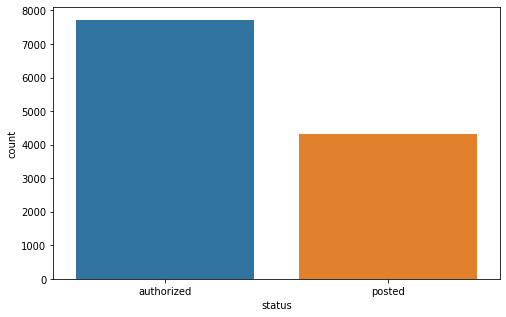

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('status', data=data)

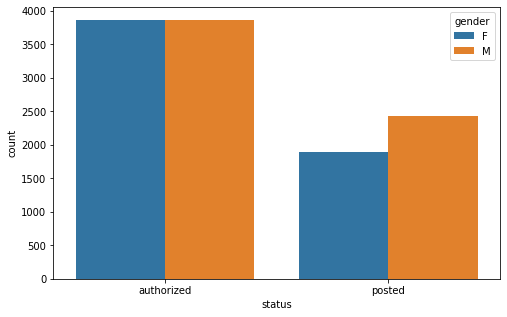

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('status', data=data, hue = 'gender')

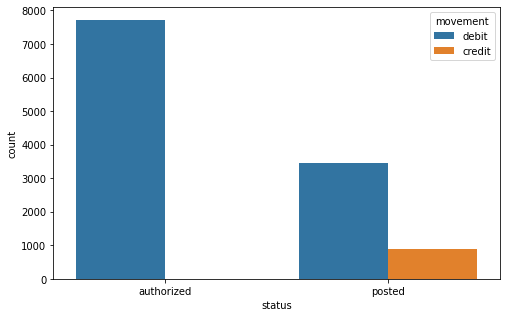

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('status', data=data, hue='movement')

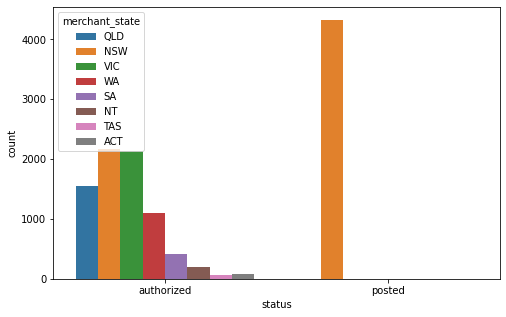

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('status', data=data, hue='merchant_state')

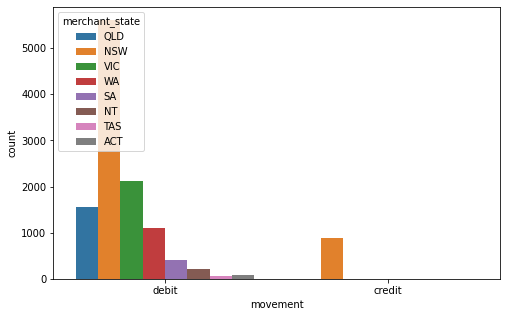

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('movement', data=data, hue='merchant_state')

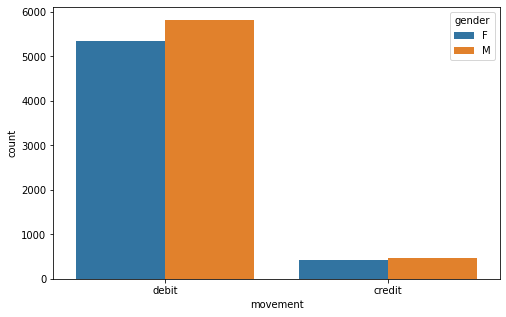

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('movement', data=data, hue='gender')

In [34]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

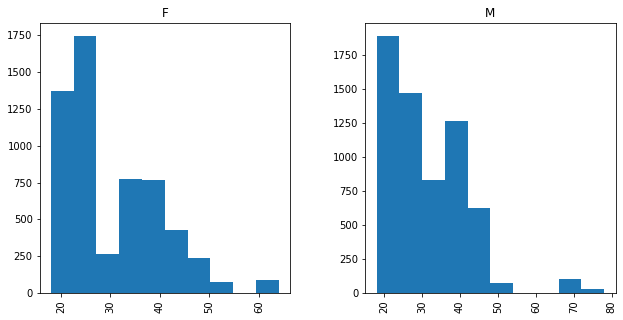

In [35]:
data['age'].hist(by=data['gender'], figsize=(10,5))
plt.show()

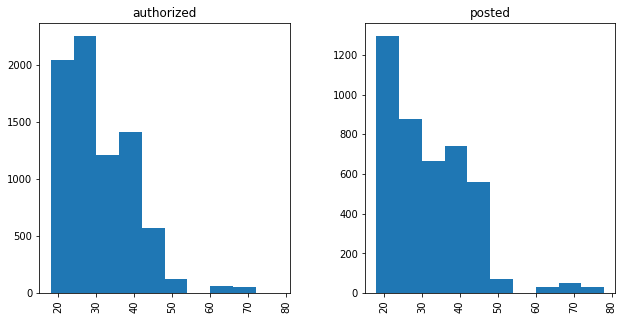

In [36]:
data['age'].hist(by=data['status'], figsize=(10,5))
plt.show()

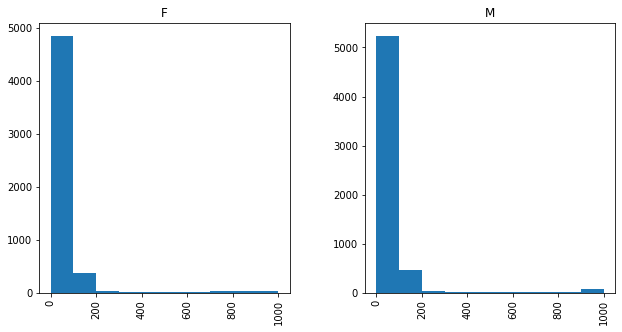

In [37]:
data['amount'].hist(by=data['gender'], figsize=(10,5), range=[0, 1000])
plt.show()

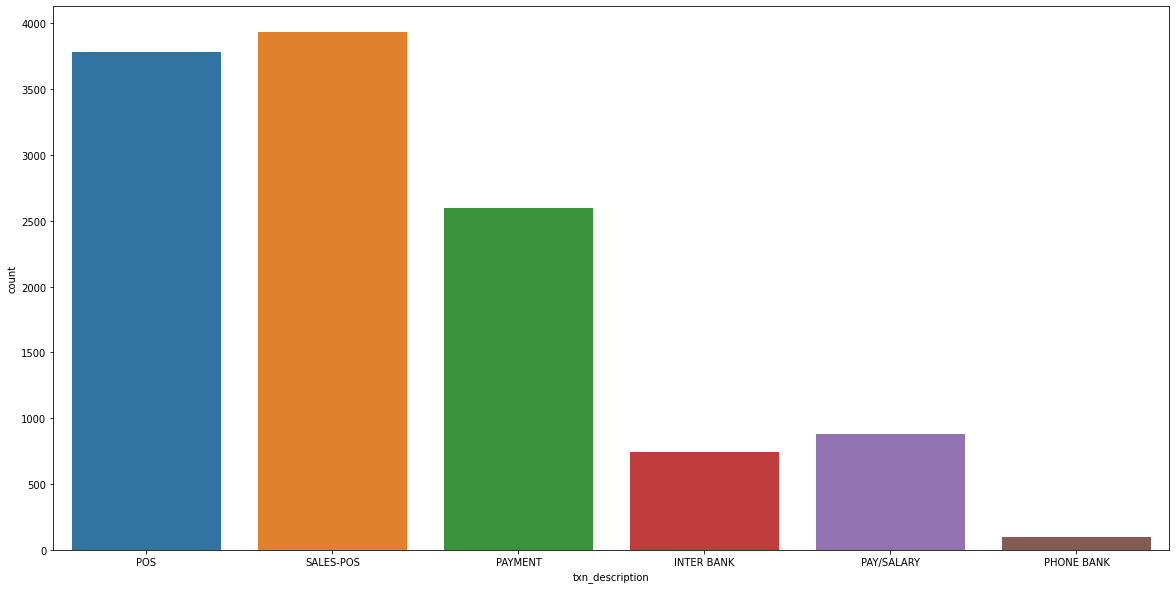

In [38]:
plt.figure(figsize=(20,10))
sns.countplot('txn_description', data=data )

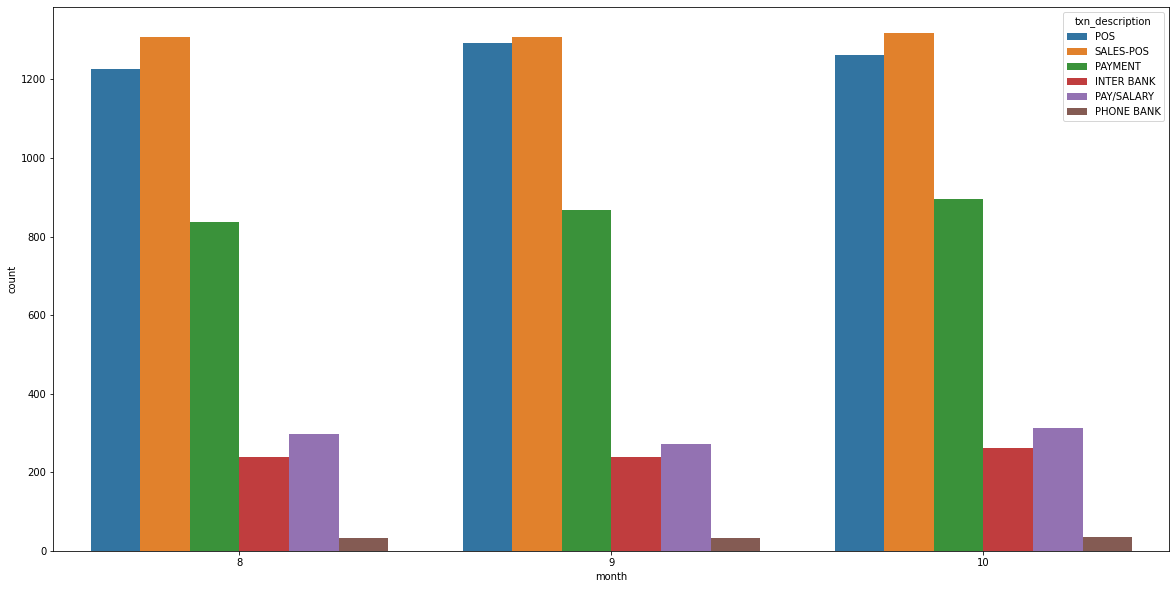

In [39]:
plt.figure(figsize=(20,10))
sns.countplot('month', data=data, hue='txn_description' )

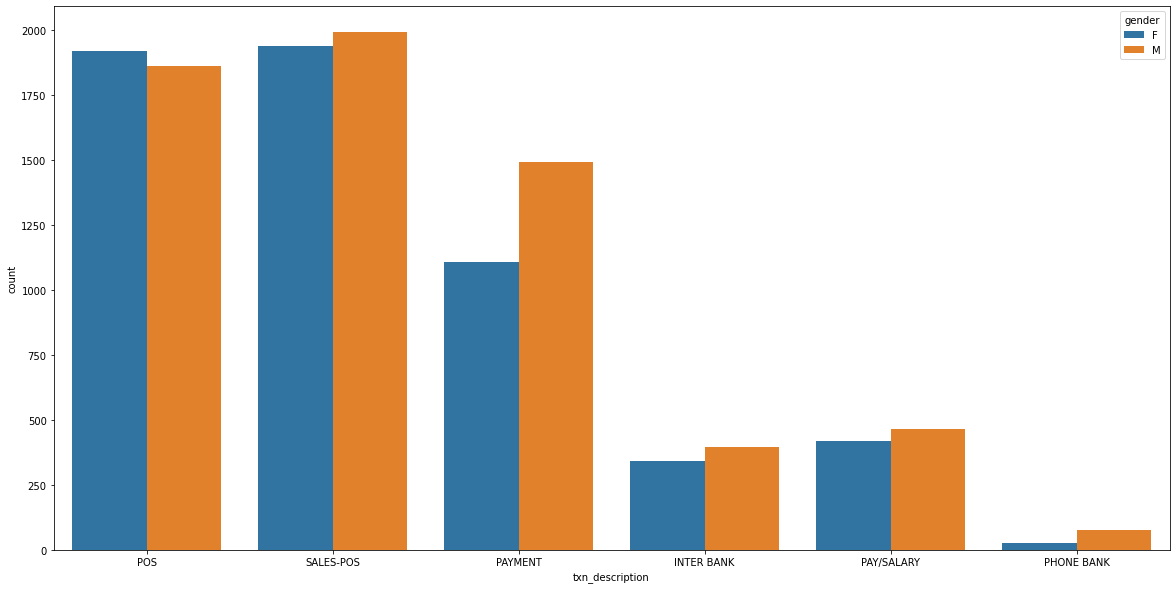

In [40]:
plt.figure(figsize=(20,10))
sns.countplot('txn_description', data=data, hue='gender' )

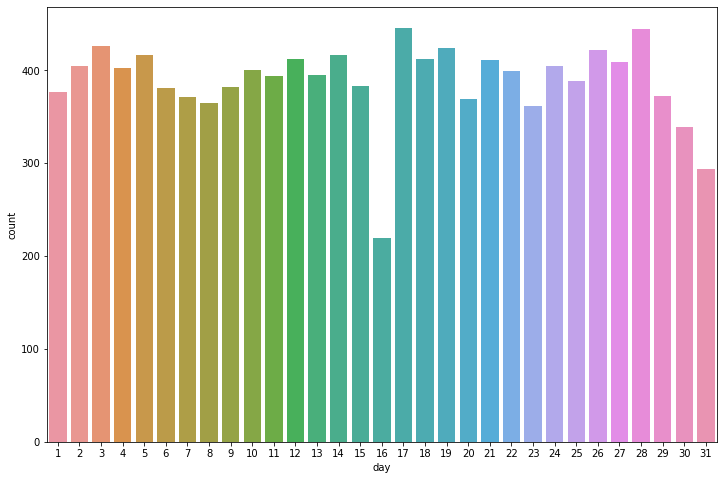

In [41]:
plt.figure(figsize=(12,8))
sns.countplot('day', data=data)

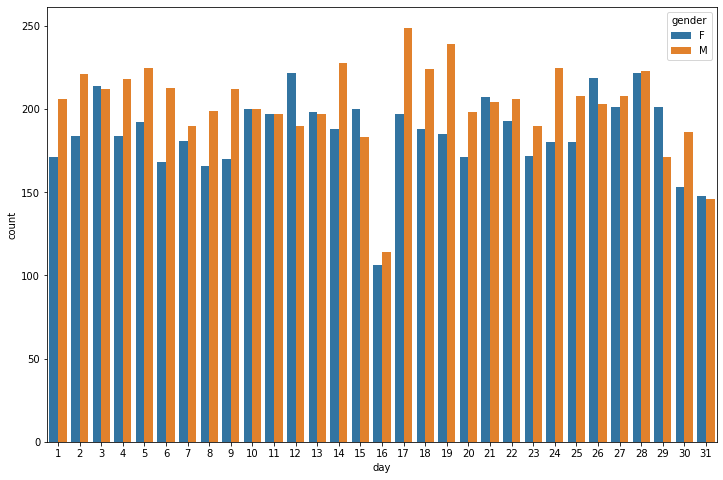

In [42]:
plt.figure(figsize=(12,8))
sns.countplot('day', data=data, hue = 'gender')

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not lay

<Figure size 1440x720 with 0 Axes>

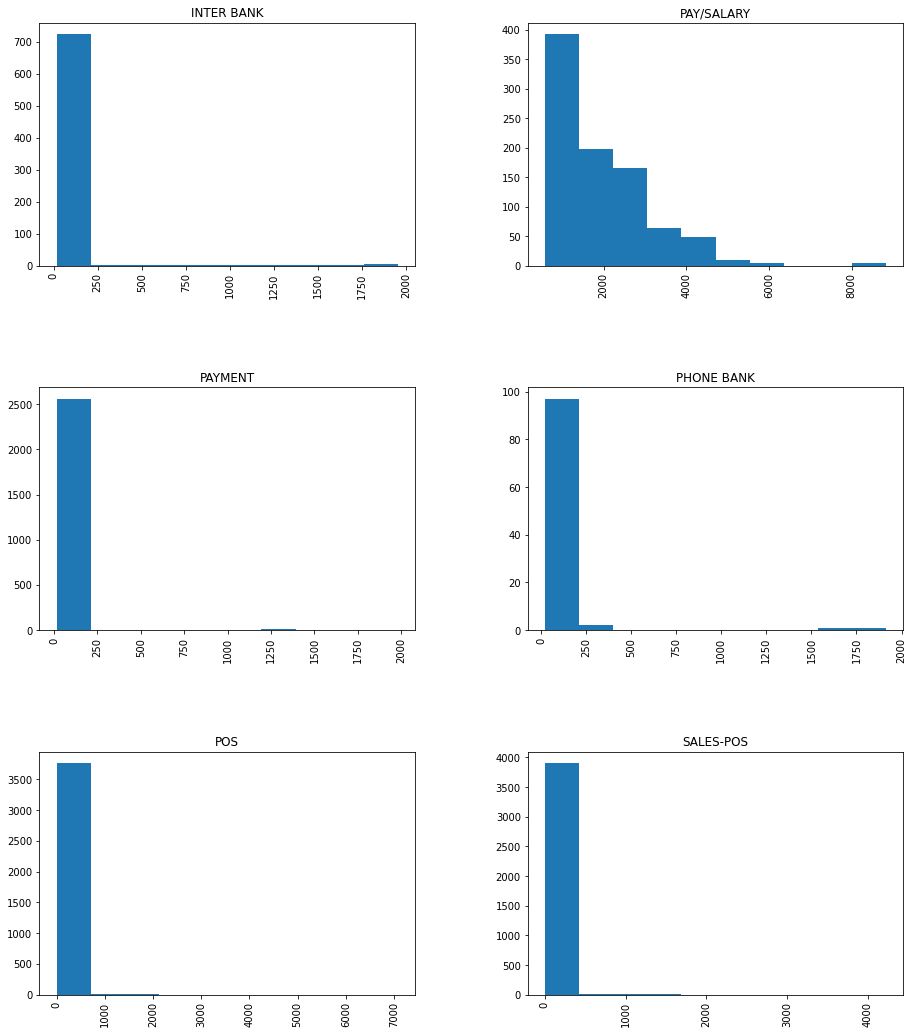

In [43]:
plt.figure(figsize=(20,10))
data['amount'].hist(by=data['txn_description'], figsize=(15, 18))
plt.show()

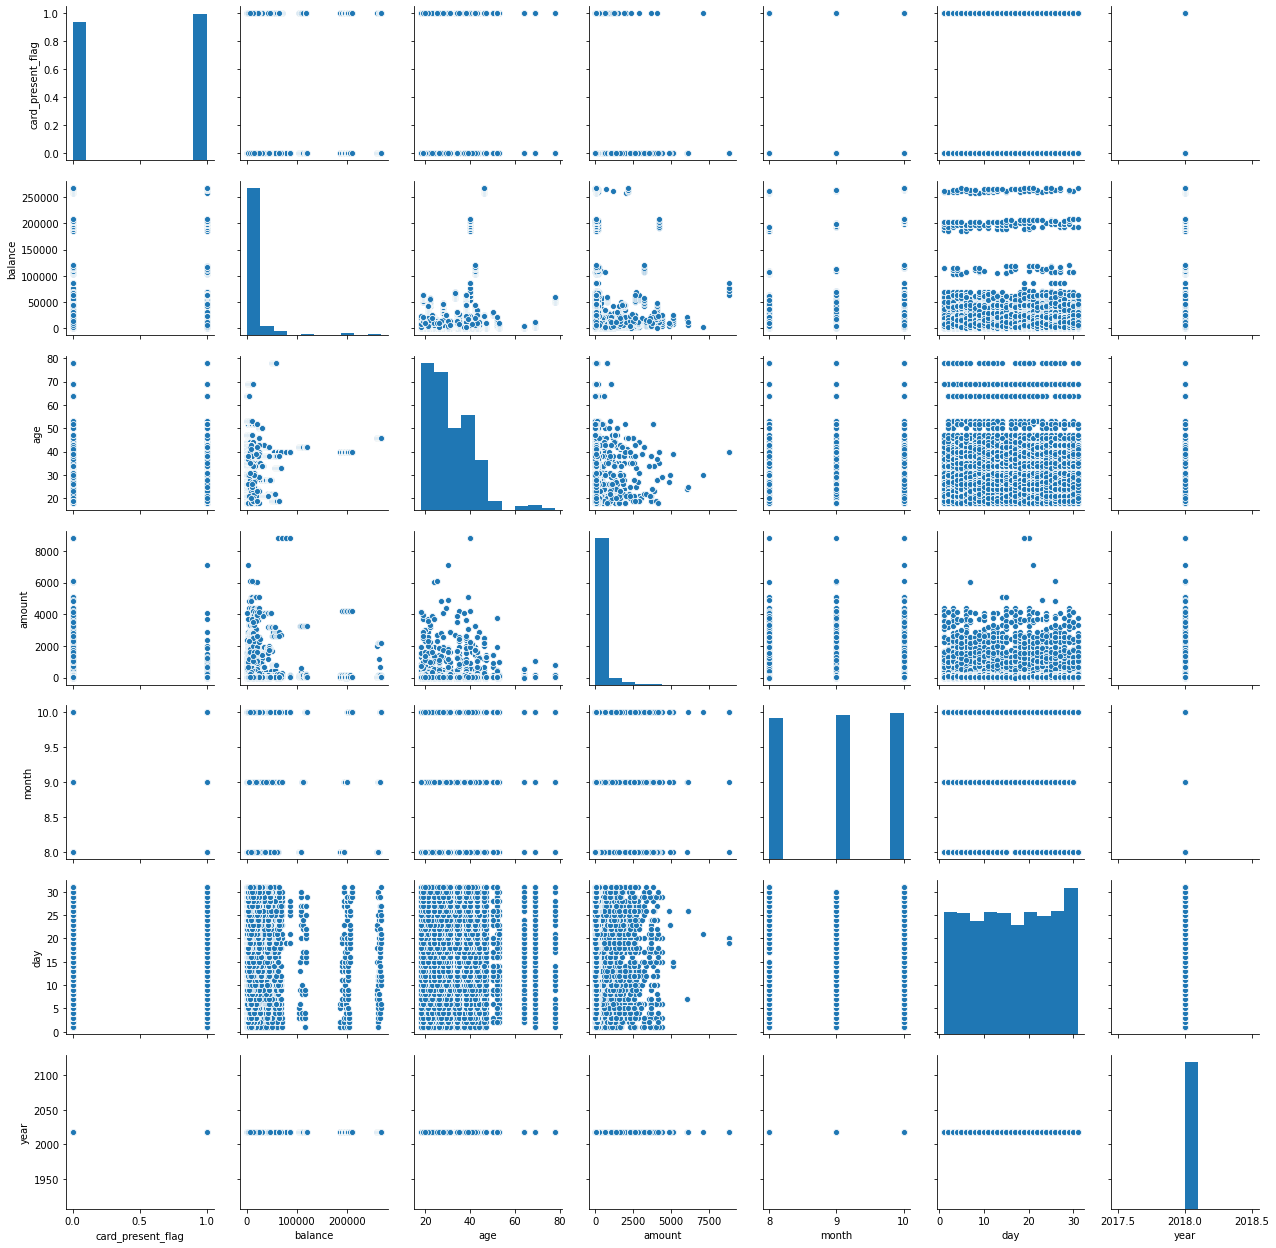

In [44]:
sns.pairplot(data)

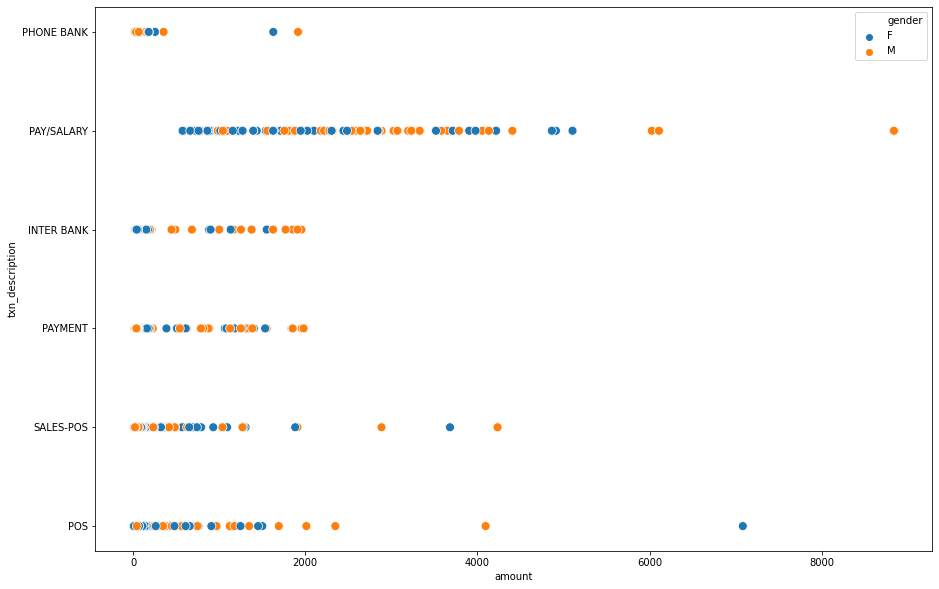

In [61]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'amount', y = 'txn_description', data=data, hue='gender', s=80)




# Predictive Analysis

In [68]:
atv = data['amount'].sum()

In [69]:
atv

2263284.2

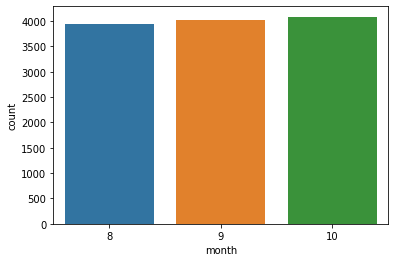

In [77]:
sns.countplot(data['month'])

In [73]:
data['month'].value_counts()

10    4087
9     4013
8     3943
Name: month, dtype: int64

In [74]:
data['month'].value_counts().sum()

12043

In [92]:
atv8 = data[data['month'] == 8]

In [93]:
atv8.shape

(3943, 24)

In [99]:
atv8.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day,year
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Missing,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,1,2018
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Missing,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,1,2018
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,Missing,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,1,2018
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Missing,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,1,2018
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Missing,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,1,2018


In [95]:
atv9 = data[data['month'] ==9]

In [96]:
atv10 = data[data['month'] ==10]

In [102]:
amount8 = atv8['amount'].sum()

In [103]:
amount8

729935.52

In [117]:
atv8['amount'].shape

(3943,)

In [118]:
month8ATV = amount8/3943

In [120]:
print('Average Transaction in Month 8: ', month8ATV)

Average Transaction in Month 8:  185.12186659903628


In [121]:
amount9 = atv9['amount'].sum()

In [122]:
amount9

730550.2100000001

In [124]:
atv9.shape

(4013, 24)

In [125]:
month9ATV = amount9/4013

In [134]:
print('Average Transaction in Month 9: ',month9ATV)

Average Transaction in Month 9:  182.04590331422878


In [128]:
amount10 = atv10['amount'].sum()

In [129]:
amount10

802798.4700000001

In [130]:
atv10.shape

(4087, 24)

In [131]:
month10ATV = amount10/4087

In [133]:
print('Average Transaction in Month 10: ',month10ATV )

Average Transaction in Month 10:  196.42732321996576


In [140]:
dict = {'month 8': '185', 'month 9': '182', 'month 10': '196'}

In [143]:
dict['month 8']

'185'

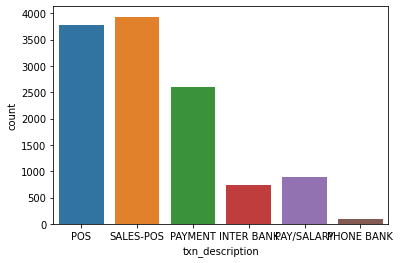

In [148]:
sns.countplot(data['txn_description'])

In [149]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [201]:
salary_tran = data[data['txn_description'] == 'PAY/SALARY']

In [202]:
salary_tran

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day,year
50,posted,0.0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,0,Isaiah,8342.11,2018-08-01,M,23,Melbourne,NSW,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,8,1,2018
61,posted,0.0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,0,Marissa,2040.58,2018-08-01,F,23,Melbourne,NSW,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,8,1,2018
64,posted,0.0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,0,Eric,3158.51,2018-08-01,M,22,Melbourne,NSW,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,8,1,2018
68,posted,0.0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,0,Jeffrey,2517.66,2018-08-01,M,24,Melbourne,NSW,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,8,1,2018
70,posted,0.0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,0,Kristin,2271.79,2018-08-01,F,43,Melbourne,NSW,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,8,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,0.0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,0,Antonio,9378.51,2018-10-31,M,26,Melbourne,NSW,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,10,31,2018
12000,posted,0.0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,0,Michele,3440.01,2018-10-31,F,30,Melbourne,NSW,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,10,31,2018
12001,posted,0.0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,0,Tyler,11381.44,2018-10-31,M,69,Melbourne,NSW,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,10,31,2018
12003,posted,0.0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,0,Susan,11454.52,2018-10-31,F,20,Melbourne,NSW,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,10,31,2018


In [203]:
salary_tran['amount'].sum()

1676576.85

In [204]:
len(salary_tran['customer_id'].unique())

100

In [205]:
xu = salary_tran['amount'].sum()/100

In [206]:
xu*356

5968613.586000001